In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split

In [4]:
xls = pd.ExcelFile('/Users/asheshlalshrestha/Desktop/UB/Research/CarePathways/Models/Datasets/PhyAdRsnComorbMed.xlsx')
df1 = pd.read_excel(xls, 'Hospital-length-of-stay')
df3 = pd.read_excel(xls, 'Data-at-admission')

### Dataset for the length of stay

In [5]:
df1.head()

,id,parent_id,did_the_patient_expire_in_hospital,reason_for_death,days_in_hospital_prior_to_expiration,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation,days_to_first_covid19_test_negative
0,1,1,Yes,Hospital acquired Pneumonia,20.0,21,NaN,NaN,NaN,NaN,NaN
1,2,2,No,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
2,3,3,No,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
3,4,4,Yes,COVID-19 Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN
4,5,5,Yes,COVID-Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN


In [6]:
df1.shape

(508, 11)

### Droping id from df1 and renaming parent_id to id as we will be matching both the dataframe on the basis of parent_id

In [7]:
df1 = df1.drop('id',axis=1)
df1.rename(columns={'parent_id': 'id'}, inplace=True)

In [8]:
df1.head()

,id,did_the_patient_expire_in_hospital,reason_for_death,days_in_hospital_prior_to_expiration,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation,days_to_first_covid19_test_negative
0,1,Yes,Hospital acquired Pneumonia,20.0,21,NaN,NaN,NaN,NaN,NaN
1,2,No,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
2,3,No,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
3,4,Yes,COVID-19 Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN
4,5,Yes,COVID-Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN


### Dataset for data at admission

In [9]:
df3.head()

,id,age,sex,height,weight,smoking_history,year_they_quit,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,Rybelsus,Prozac Capsules,Methylprednisolone Acetate Injectable Suspension Usp
0,1,74,1,NaN,NaN,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2,61,0,154.9,73.6,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,3,58,0,NaN,NaN,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,4,94,1,182.8,66.2,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,5,91,1,NaN,NaN,1.0,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [10]:
df3.shape

(508, 750)

### Matching the hospital length of stay with the data at admission on the basis of id

In [11]:
df3 = pd.merge(df1, df3,on='id', how='inner')

In [12]:
df3

,id,did_the_patient_expire_in_hospital,reason_for_death,days_in_hospital_prior_to_expiration,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation,days_to_first_covid19_test_negative,...,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,Rybelsus,Prozac Capsules,Methylprednisolone Acetate Injectable Suspension Usp
0,1,Yes,Hospital acquired Pneumonia,20.0,21,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2,No,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,3,No,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,4,Yes,COVID-19 Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,5,Yes,COVID-Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,517,Yes,NaN,19.0,19,6.0,13.0,5.0,15.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
504,519,No,NaN,NaN,9,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
505,521,No,NaN,NaN,7,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,522,No,NaN,NaN,5,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping the id and other columns from as it is not necessary

In [13]:
cols_to_drop = ['did_the_patient_expire_in_hospital',
       'reason_for_death', 'days_in_hospital_prior_to_expiration',
        'icu_length_of_stay',
       'days_in_hospital_prior_to_icu_admission',
       'time_on_mechanical_ventilation',
       'days_in_hospital_prior_to_mechanical_ventilation',
       'days_to_first_covid19_test_negative']
df3 = df3.drop(cols_to_drop,axis=1)

In [14]:
# df3.to_csv("Datasets/new.csv")

In [15]:
# df3 = df3.drop("id",axis=1)

In [16]:
df3.head()

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,year_they_quit,previous_er_visit_within_14_days,admission_disposition,...,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,Rybelsus,Prozac Capsules,Methylprednisolone Acetate Injectable Suspension Usp
0,1,21,74,1,NaN,NaN,NaN,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2,5,61,0,154.9,73.6,NaN,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,3,7,58,0,NaN,NaN,NaN,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,4,9,94,1,182.8,66.2,NaN,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,5,9,91,1,NaN,NaN,1.0,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


### Thus df3 becomes our final dataset on which we will be preprocessing and making the model
#### Counting the null values
We can see that there are null values in 
1. height
2. weight
3. smoking_history
4. year_they_quit
5. Rest of the morbid conditions

In [17]:
null_counts = df3.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
print(columns_with_null)

height                                                  236
weight                                                  150
smoking_history                                         430
year_they_quit                                          247
Tylenol Extra Strength                                    2
                                                       ... 
Cogentin Tab                                              2
Elavil                                                    2
Rybelsus                                                508
Prozac Capsules                                         508
Methylprednisolone Acetate Injectable Suspension Usp    508
Length: 700, dtype: int64


In [18]:
df3.isnull().sum().reset_index(name='counts').sort_values(by='counts',ascending=False)

,index,counts
750,Methylprednisolone Acetate Injectable Suspensi...,508
749,Prozac Capsules,508
748,Rybelsus,508
6,smoking_history,430
7,year_they_quit,247
...,...,...
36,reason_for_admission_Cough [R05],0
35,reason_for_admission_Coronavirus infection [B3...,0
34,reason_for_admission_COVID-19 with multiple co...,0
33,reason_for_admission_COVID-19 virus infection ...,0


## Data cleaning

#### We will handle the null values in height and weight with the mean values and the null values in smoking history will be handled by entering 0 as 1 means they have a history

In [19]:
df3['height'] = df3['height'].fillna(df3['height'].mean())
df3['weight'] = df3['weight'].fillna(df3['weight'].mean())
df3['smoking_history']=df3['smoking_history'].fillna(0)

### We are droping year_they_quit as they have no significance and rest of the tables as they have no values for the 508 rows

In [20]:
df3 = df3.drop(['year_they_quit','Methylprednisolone Acetate Injectable Suspension Usp','Prozac Capsules','Rybelsus'],axis=1)

In [21]:
a = df3.isnull().sum().reset_index(name='Null counts')
a

,index,Null counts
0,id,0
1,hospital_length_of_stay,0
2,age,0
3,sex,0
4,height,0
...,...,...
742,Desvenlafaxine,2
743,Glucosamine,2
744,Turmeric,2
745,Cogentin Tab,2


### Dropped the null rows as only Elavil had 2 rows that had null values

In [31]:
df3 = df3.dropna()

### Now we can see that there are no null values

In [32]:
null_counts = df3.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
columns_with_null

Series([], dtype: int64)

In [33]:
a = df3.isnull().sum().reset_index(name='Null counts')
a

,index,Null counts
0,id,0
1,hospital_length_of_stay,0
2,age,0
3,sex,0
4,height,0
...,...,...
742,Desvenlafaxine,0
743,Glucosamine,0
744,Turmeric,0
745,Cogentin Tab,0


In [245]:
df3

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,1,21,74,1,166.911029,80.265922,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5,61,0,154.900000,73.600000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,7,58,0,166.911029,80.265922,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,9,94,1,182.800000,66.200000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,9,91,1,166.911029,80.265922,1.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,515,2,56,0,165.000000,72.600000,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
502,516,13,74,0,166.911029,55.000000,0.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,517,19,81,1,158.000000,65.000000,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,519,9,74,1,166.911029,81.700000,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [246]:
# df3.to_csv("Datasets/new.csv")

### Standarizing the dataset where we will only standarize the three columns:
1. age
2. height
3. weight

In [247]:
columns_to_standardize = ['age', 'height', 'weight']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns using the scaler
df3[columns_to_standardize] = scaler.fit_transform(df3[columns_to_standardize])

### Scaled dataset

In [248]:
df3.head()

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,1,21,0.485152,1,0.003233,0.001623,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,7,-0.491182,0,0.003233,0.001623,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,9,1.705571,1,1.989114,-0.766671,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,9,1.522508,1,0.003233,0.001623,1.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
# df3.to_csv("Datasets/preprocessed_dataset.csv")

### Splitting train and test dataset
1. y is the Target variable which is the 'hospital_length_of_stay'
2. X will be everything except the target variable

In [149]:
from sklearn.model_selection import train_test_split

X = df3.drop('hospital_length_of_stay', axis =1)

y = df3.hospital_length_of_stay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Testing for the principal component ananlysis

In [113]:
 # Create PCA object forming 10 PCs
pca = PCA(n_components = 8)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape)                                      

[[-0.46417141 -0.80129233  0.25083245 ... -0.11528691  0.13507631
   0.91674995]
 [-0.99377689  1.12362895  0.58475616 ... -0.18414839  0.05395071
  -0.25470927]
 [ 0.21811314  0.47782886 -0.08690195 ... -0.41413168 -0.36760772
  -0.29036516]
 ...
 [-0.5173039   0.14830091  0.27812501 ... -0.63834048 -0.41109661
   0.77500572]
 [-0.04720956  0.87070228 -0.31245149 ... -0.17452499 -0.29803026
  -0.01603153]
 [-1.03948595  0.31289641 -1.04146738 ... -0.75423302 -0.13658352
   0.53654069]]
(492, 8)


In [114]:
## total pca numbers initially
PC_number = np.arange(pca.n_components_) + 1 
print(PC_number)                                                        

[1 2 3 4 5 6 7 8]


In [115]:
#tract proportion of explained variance
var = pca.explained_variance_ 
# we will get 10 value of explained variance
print(var)

[1.71875355 0.97427485 0.64895225 0.34992135 0.33993993 0.2182952
 0.20463796 0.18647738]


### Plotting the graph for explained variance vs the number of components

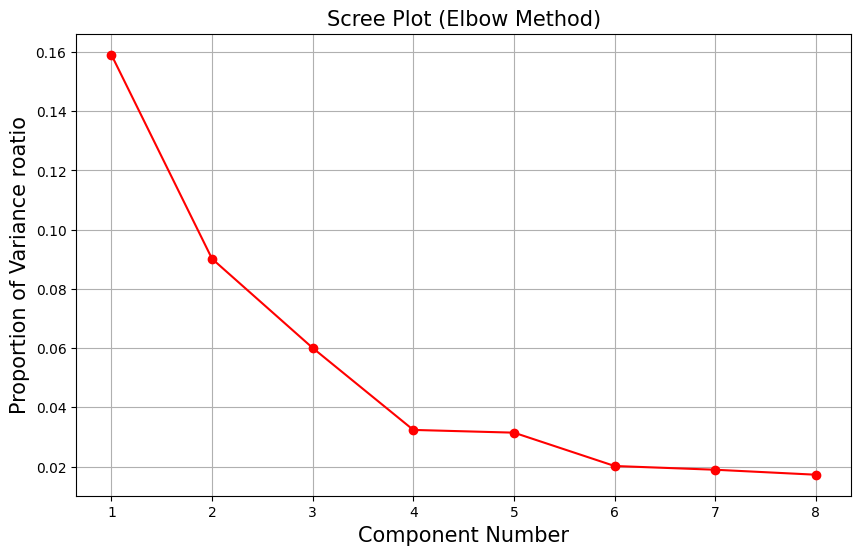

0.42954598858602605

In [116]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))                          
plt.plot(PC_number,                                  
         explained_variance_ratios,
         'ro-')
plt.title('Scree Plot (Elbow Method)',       
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Proportion of Variance roatio',
           fontsize = 15)
plt.grid()                                                       
plt.show()        
sum(explained_variance_ratios)

In [117]:
explained_variance_ratios

array([0.15906993, 0.09016873, 0.06006026, 0.03238508, 0.0314613 ,
       0.02020313, 0.01893916, 0.0172584 ])

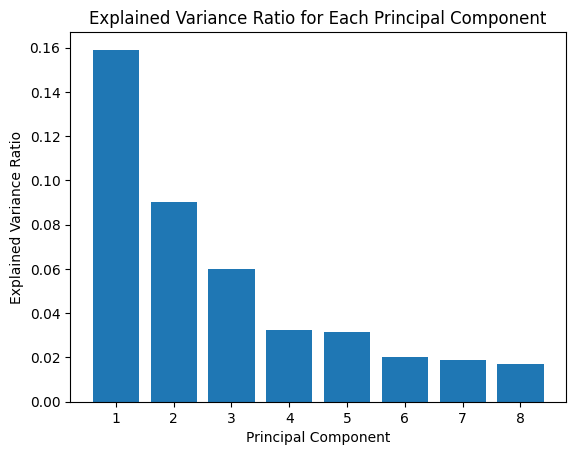

In [118]:
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Creating a model, initially for lasso regression

In [119]:
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model using the training data
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 157.8136540937942


### Getting the importance of the features that is defined by the coeffecients distributed by lasso regression

In [120]:
# Get feature importances from coefficients
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': abs(lasso.coef_)}).sort_values(by='Importance', ascending=False)

feature_importances 

,Feature,Importance
481,Quetiapine,14.334114
232,Cymbalta,7.893610
288,Diovan,6.751288
44,reason_for_admission_Respiratory distress [R06.0],5.752694
359,Ventolin,5.170534
...,...,...
271,Ozempic,0.000000
272,Tresiba,0.000000
273,Ralivia,0.000000
274,Ventolin Hfa,0.000000


### Important features are those which have importance of more than 0

In [121]:
# Print feature importances
important_features = feature_importances[feature_importances['Importance']>0]
important_features

,Feature,Importance
481,Quetiapine,1.433411e+01
232,Cymbalta,7.893610e+00
288,Diovan,6.751288e+00
44,reason_for_admission_Respiratory distress [R06.0],5.752694e+00
359,Ventolin,5.170534e+00
201,Avodart,4.910481e+00
388,Janumet Xr,4.385596e+00
72,Lasix Tabs,4.220799e+00
246,Lantus,3.979994e+00
14,Asthma,3.555104e+00


### Dropping the unimportant features from X

In [122]:
feature_array = important_features['Feature'].values

cols_to_drop = [col for col in X.columns if col not in feature_array]

new_x_for_lasso = X.drop(cols_to_drop,axis=1)

### Our new_x_for_lasso will have features that do have only 37 columns

In [123]:
new_x_for_lasso

,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Diabetes,Other,Obesity,Asthma,...,Decadron Tab,Calcium,Ventolin,Janumet Xr,Phenylephrine Hydrochloride,Quetiapine,Vit D 3,Exetimibe,Rebeprazole,Diamicron
0,1,0.003310,0.001668,0.0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-1.493392,-0.359504,0.0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.003310,0.001668,0.0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.980189,-0.762473,0.0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.003310,0.001668,1.0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1,-1.107438,-0.348613,0.0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,1,0.003310,0.001668,1.0,1,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0,-0.360432,-0.168911,0.0,1,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,0,-0.235931,-0.413960,0.0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting the new df 
we can see that we are getting the same mse with lesser number of features

In [124]:
X_train, X_test, y_train, y_test = train_test_split(new_x_for_lasso, y, test_size=0.3, random_state=42)

# Train the model using the training data
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 157.79534242244915


### Again conducting pca in the new df

In [125]:
# Ideal Number of Components
pca = PCA(n_components = 15)                      # Create PCA object forming 10 PCs
pca_trans = pca.fit_transform(new_x_for_lasso)     # Transform data
print(pca_trans)                                                  # Print transformed data
print(pca_trans.shape)                                      # Print dimensions of transformed data

[[ 0.02081472 -0.04710793  0.991585   ... -0.2234608   0.3010242
   0.11696348]
 [-1.41857749  0.7876524  -0.2373149  ... -0.13129593 -0.06209339
   0.02269175]
 [-0.07806419  0.06786893 -0.54951635 ... -0.09604432 -0.10026927
   0.07358334]
 ...
 [-0.49147106  0.19034775  0.42844652 ...  0.07084531 -0.26287568
   0.16738221]
 [-0.56538707 -0.03943712 -0.23594357 ... -0.08684643 -0.03167721
   0.03043872]
 [-1.02282212 -0.90954456 -0.4097409  ... -0.05283922 -0.00989255
  -0.00982531]]
(492, 15)


Explained Variance Ratios for each component:
Component 1: 0.31224489264581845
Component 2: 0.13986100414883104
Component 3: 0.0655131861641049
Component 4: 0.05490492618030564
Component 5: 0.04079178358446165
Component 6: 0.03822811613467989
Component 7: 0.03310681112038332
Component 8: 0.030788900616673675
Component 9: 0.026735345809438135
Component 10: 0.023675931487446268
Component 11: 0.02069335109083033
Component 12: 0.017074686466314066
Component 13: 0.016041504616561973
Component 14: 0.013364665361895872
Component 15: 0.012913053223673192


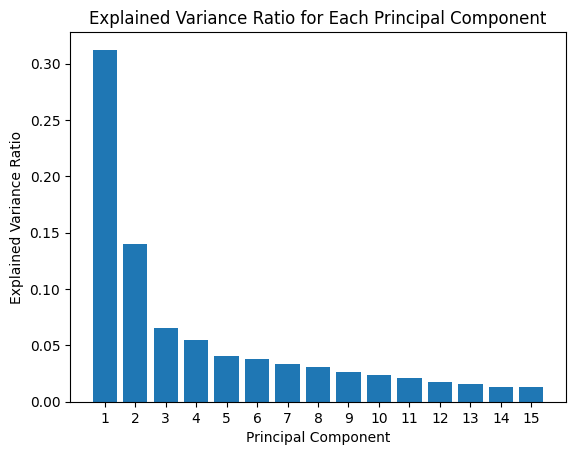

In [126]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Fitting the reduced dimension values

In [127]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

In [128]:
# Train the model using the training data
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 149.36877831592545


### Hyperparameter tuning for lasso

In [129]:
lasso = Lasso()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} 

# Perform grid search using cross-validation (CV)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Use the best hyperparameters to fit the model
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lasso.predict(X_train))
mse_test = mean_squared_error(y_test, best_lasso.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Best Alpha: 1
Train MSE: 140.39288830306793
Test MSE: 149.36877831592545


### We will deep dive into classificaion modeling
1. We will see the stats in the target variable which is hospital length of stay
2. We can see that the mean is 12 days

In [130]:
df4 = df3
df4

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,21,0.486844,1,0.003310,0.001668,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,-0.303876,0,-1.493392,-0.359504,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,-0.486350,0,0.003310,0.001668,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,1.703337,1,1.980189,-0.762473,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,1.520863,1,0.003310,0.001668,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2,0.365195,1,-1.107438,-0.348613,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,4,-0.547175,1,0.003310,0.001668,1.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
489,2,0.121897,0,-0.360432,-0.168911,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
490,13,-0.607999,0,-0.235931,-0.413960,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [131]:
df4['hospital_length_of_stay'].describe()

count    492.000000
mean      12.467480
std       11.968941
min        1.000000
25%        5.000000
50%        8.000000
75%       15.000000
max       81.000000
Name: hospital_length_of_stay, dtype: float64

### Anything above 12 days will be 1 and anything below will be 0
Which means that 1 is a long stay and 0 is a short stay

In [132]:
df4['hospital_length_of_stay'] = df4['hospital_length_of_stay'].apply(lambda x: 1 if x > 12 else 0)

In [133]:
df4['hospital_length_of_stay'].value_counts()

hospital_length_of_stay
0    340
1    152
Name: count, dtype: int64

### Initally we will use the logistic regression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df4.drop('hospital_length_of_stay',axis=1)
y= df4['hospital_length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6216216216216216


### Conducting PCA

In [135]:
 # Create PCA object forming 10 PCs
pca = PCA(n_components = 15)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape)                       

[[-0.46417141 -0.80129233  0.25083266 ... -0.12021789 -0.29216633
   0.26473622]
 [-0.99377689  1.12362895  0.58475618 ... -0.0162269  -0.14443999
   0.02041453]
 [ 0.21811314  0.47782886 -0.08690193 ...  0.46335222 -0.03170272
   0.42366616]
 ...
 [-0.5173039   0.14830091  0.27812528 ... -0.81448287  0.04920762
  -0.17820718]
 [-0.04720956  0.87070228 -0.31245152 ...  0.09605788 -0.10672306
  -0.31171478]
 [-1.03948595  0.31289641 -1.04146741 ... -0.62487005 -0.05217066
  -0.32840091]]
(492, 15)


Explained Variance Ratios for each component:
Component 1: 0.15906992694690808
Component 2: 0.09016873220169593
Component 3: 0.06006026146324596
Component 4: 0.03238507561751431
Component 5: 0.0314612993971837
Component 6: 0.02020313197288775
Component 7: 0.0189392083409561
Component 8: 0.01725847756856577
Component 9: 0.016412979350339394
Component 10: 0.01562217362591837
Component 11: 0.013916867144430215
Component 12: 0.013034489683716023
Component 13: 0.012727910400427308
Component 14: 0.011770154950554897
Component 15: 0.011440737921049443


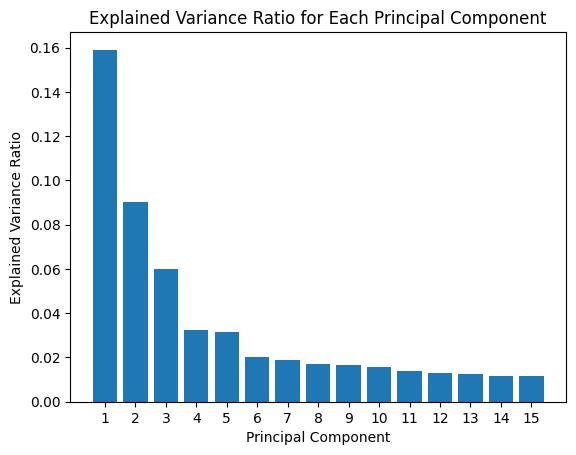

In [136]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

In [138]:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6554054054054054


### Feature importance

In [139]:
X = df4.drop('hospital_length_of_stay',axis=1)
y= df4['hospital_length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Get the coefficients (importance) of each feature
coefficients = model.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance_df

,Feature,Coefficient
0,age,0.127184
1,sex,-0.052208
2,height,-0.197650
3,weight,-0.011044
4,smoking_history,-0.248503
...,...,...
740,Desvenlafaxine,-0.094043
741,Glucosamine,-0.082184
742,Turmeric,0.000000
743,Cogentin Tab,0.000000


### Important features

In [140]:
# Print feature importances
important_features = feature_importance_df[feature_importance_df['Coefficient']!=0].sort_values(by='Coefficient',ascending=False)
important_features

,Feature,Coefficient
481,Quetiapine,1.107826
38,reason_for_admission_Hypoxia [R09.0],0.905565
72,Lasix Tabs,0.899627
188,Ezetrol,0.884036
177,Vitamin B Complex Tab,0.822990
...,...,...
80,Bisoprolol,-0.844917
104,Advair Diskus,-0.921723
14,Asthma,-0.951280
196,Coversyl,-1.008880


### Removing unimportant features

In [141]:
feature_array = important_features['Feature'].values

cols_to_drop = [col for col in X.columns if col not in feature_array]

new_x_for_logistic = X.drop(cols_to_drop,axis=1)

### New X for logistic regression

In [142]:
new_x_for_logistic

,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),Diabetes,...,Prozac,Tylenol Extra Strength),Fenofibrate,Hydrodiuril,Ipratropium Bromide,Respiractin,Vesicare,Desvenlafaxine,Glucosamine,Elavil
0,0.486844,1,0.003310,0.001668,0.0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.303876,0,-1.493392,-0.359504,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.486350,0,0.003310,0.001668,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.703337,1,1.980189,-0.762473,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.520863,1,0.003310,0.001668,1.0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.365195,1,-1.107438,-0.348613,0.0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,-0.547175,1,0.003310,0.001668,1.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
489,0.121897,0,-0.360432,-0.168911,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
490,-0.607999,0,-0.235931,-0.413960,0.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(new_x_for_logistic, y, test_size=0.3, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6216216216216216


### Conducting PCA on the new X

In [144]:
# Ideal Number of Components
pca = PCA(n_components = 15)                      
pca_trans = pca.fit_transform(new_x_for_logistic)     
print(pca_trans)                                                 
print(pca_trans.shape)                                  

[[-0.46437936 -0.80154004  0.25115467 ... -0.10830061 -0.30046715
   0.25529543]
 [-0.99405622  1.12393505  0.58491308 ... -0.0154622  -0.15735418
   0.01707263]
 [ 0.2180406   0.47783482 -0.08686772 ...  0.45687972 -0.07475131
   0.42876031]
 ...
 [-0.51753757  0.14831438  0.27860213 ... -0.82890378  0.06315071
  -0.16832543]
 [-0.04727307  0.86891164 -0.31156363 ...  0.10149019 -0.08187466
  -0.31235899]
 [-1.03977921  0.31263002 -1.04153255 ... -0.62952051 -0.00804956
  -0.35002236]]
(492, 15)


Explained Variance Ratios for each component:
Component 1: 0.1632579350109023
Component 2: 0.09252232127750949
Component 3: 0.061618018310943205
Component 4: 0.03318854833508023
Component 5: 0.03223654534460371
Component 6: 0.020696875788475726
Component 7: 0.019383055951760902
Component 8: 0.01766412972355868
Component 9: 0.016801015589815615
Component 10: 0.01597119157016013
Component 11: 0.014193025007280877
Component 12: 0.013292041239099332
Component 13: 0.013027126323317989
Component 14: 0.011999347025537925
Component 15: 0.011650729275552198


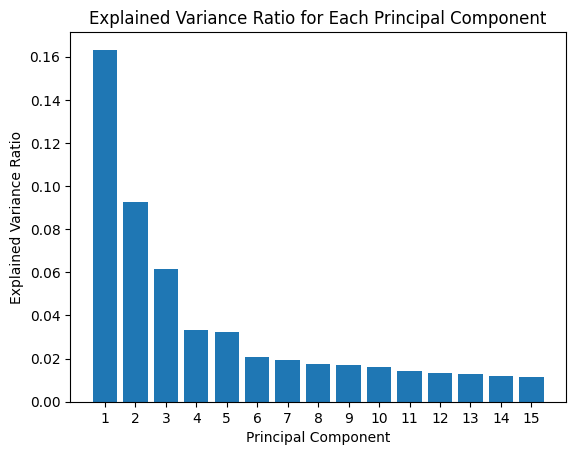

In [145]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [146]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6554054054054054


### Calculating the feature importance

In [147]:
df4

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,1,0.486844,1,0.003310,0.001668,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.303876,0,-1.493392,-0.359504,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,-0.486350,0,0.003310,0.001668,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.703337,1,1.980189,-0.762473,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.520863,1,0.003310,0.001668,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0,0.365195,1,-1.107438,-0.348613,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,0,-0.547175,1,0.003310,0.001668,1.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
489,0,0.121897,0,-0.360432,-0.168911,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
490,1,-0.607999,0,-0.235931,-0.413960,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [158]:
from sklearn.ensemble import RandomForestClassifier


X = df4.drop('hospital_length_of_stay',axis=1)
y= df4['hospital_length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

f_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get the indices of features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance',ascending=False)

feature_importances

array([6.87787128e-02, 1.49412954e-02, 5.18782584e-02, 4.32955795e-02,
       1.16207896e-02, 4.77600511e-03, 7.68719478e-03, 1.03811443e-02,
       3.97891489e-03, 8.45426915e-03, 2.81697560e-03, 1.84774705e-02,
       1.79266574e-03, 7.57190740e-03, 1.59922001e-02, 0.00000000e+00,
       3.73691198e-03, 5.01603966e-04, 3.91841781e-03, 3.53885817e-03,
       2.40660714e-03, 0.00000000e+00, 3.84535574e-04, 2.63621066e-03,
       3.55301661e-03, 0.00000000e+00, 0.00000000e+00, 8.95329489e-04,
       1.83132789e-02, 0.00000000e+00, 3.42752168e-04, 2.01589765e-03,
       0.00000000e+00, 3.72708829e-05, 8.04340290e-04, 1.47772353e-03,
       5.73261676e-04, 0.00000000e+00, 6.22304801e-03, 6.92905773e-04,
       3.18364876e-03, 1.30542479e-02, 0.00000000e+00, 4.89598012e-03,
       4.40695020e-03, 4.37027524e-04, 0.00000000e+00, 9.90384601e-03,
       0.00000000e+00, 2.24836955e-04, 1.58220718e-04, 9.25711764e-04,
       3.53014554e-03, 1.45267207e-04, 5.93913298e-03, 8.20350787e-03,
      

In [159]:
sorted_indices

array([  0,   2,   3,  11,  28,  14,   1, 481,  41,   4, 392,   7,  47,
       359, 372, 525,  80, 163,   9,  55, 403, 283,   6,  13, 288, 423,
       185,  83, 188, 202, 252,  38, 584, 495, 432, 196,  54, 446, 119,
       186, 667, 600,  58, 565, 604,  95, 236, 552, 287,  43,   5, 434,
       305, 325,  75, 330, 356, 618, 300,  93, 192, 369,  44, 402, 602,
       147, 276, 337, 237, 227, 204, 656, 303,   8, 126,  18, 144, 388,
        16, 411, 127, 121, 178, 157, 313, 174,  24, 394, 135,  19,  52,
       264, 228, 177, 189, 536, 104,  40, 217, 697, 720, 226, 262, 232,
       255,  70,  10, 572, 296, 181, 625,  23, 652, 621, 643,  59, 665,
       493, 282,  68, 598,  20, 145,  81, 115, 197, 130, 719, 467,  79,
       641, 274, 626, 426, 318, 183, 175, 199, 627,  31, 211, 158,  84,
        72, 634, 298, 233, 375, 520, 336, 547,  12, 429, 564, 597, 200,
       573, 681, 497, 599, 408, 513,  77, 390, 101, 170,  97, 358, 203,
        62, 122,  35, 469, 187,  67, 124, 410, 297, 234, 633, 65

### Using random forest classifier on the original dataset

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6148648648648649


### Using rf on the PCA reduced dataset

In [161]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6554054054054054


In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.23408783783783782


In [163]:
r2_score(y_test,y_pred)

-0.03647867394380411

In [164]:
## how to handle the missing value such as missing year for smoking
## how to handle should we reduce the dimension of the rows as there are 747 columns
## are we using logistic regression to predict a classified dependent variable if yes then how are we to classifiy

In [165]:
rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [166]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [167]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best Model: RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=150,
                      random_state=42)


In [168]:
y_pred = best_model.predict(X_test)

# Calculate and print Mean Squared Error (MSE) using the best model
mse = mean_squared_error(y_test, y_pred)

In [169]:
mse

0.23413129599621377

In [170]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Generate sample data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor and hyperparameter distributions
rf_regressor = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate and print Mean Squared Error (MSE) using the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) with Best Model:", mse)


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}
Mean Squared Error (MSE) with Best Model: 2565.649842419421


In [171]:
c_space = np.logspace(-5, 8, 15)

In [172]:
c_space

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])